Download and Uploading Cat's& Dog's dataset from Kaggle database

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ganeshreddynani","key":"ba1f4fcb28b5e14d673b3f206828c3f4"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:06<00:00, 180MB/s]
100% 812M/812M [00:06<00:00, 125MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

Define Training, Validation and test set samples as(1000,500 &500)

In [ ]:
import os
import shutil
import pathlib

ori_dir = pathlib.Path("train")
new_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_dir / subset_name / category
        try:
            os.makedirs(dir)
        except FileExistsError:
            print(f"Directory {dir} already exists.")
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = ori_dir / fname
            dst_file = dir / fname
            try:
                shutil.copyfile(src=src_file, dst=dst_file)
            except FileNotFoundError:
                print(f"File {src_file} not found.")
            except FileExistsError:
                print(f"File {dst_file} already exists.")

make_subset("train", start_index=800, end_index=1800)
make_subset("validation", start_index=1801, end_index=2301)
make_subset("test", start_index=2302, end_index=2802)


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_set = image_dataset_from_directory(
new_dir / "train",
image_size=(180, 180),
batch_size=32)
valid_set = image_dataset_from_directory(
new_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_set= image_dataset_from_directory(
new_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Generate a dataset instance using a NumPy array containing 1000 random samples, each with a vector size of 16

In [ ]:
import numpy as np
import tensorflow as tf
ran_numbers = np.random.normal(size=(1000, 16))
data = tf.data.Dataset.from_tensor_slices(ran_numbers)
for i, element in enumerate(data):
    print(element.shape)
    if i >= 2:
      break
    (16,)
    (16,)
    (16,)
batch_data = data.batch(32)
for i, element in enumerate(batch_data):
    print(element.shape)
    if i >= 2:
      break
    (32, 16)
    (32, 16)
    (32, 16)
reshaped_data = data.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_data):
    print(element.shape)
    if i >= 2:
      break
    (4, 4)
    (4, 4)
    (4, 4)

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


# **Create the Model**

Creating a compact neural network to distinguish between images of dogs and cats

In [ ]:
for data_batch, labels_batch in train_set:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Developing a compact convolutional neural network specifically tailored for classifying images into the "dogs" and "cats" categories.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputA = keras.Input(shape=(180, 180, 3))
A = layers.Rescaling(1./255)(inputA)
A = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(A)
A = layers.MaxPooling2D(pool_size=2)(A)
A = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(A)
A = layers.MaxPooling2D(pool_size=2)(A)
A = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(A)
A = layers.MaxPooling2D(pool_size=2)(A)
A = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(A)
A = layers.MaxPooling2D(pool_size=2)(A)
A = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(A)
A = layers.Flatten()(A)
A = layers.Dropout(0.5)(A)
outputA = layers.Dense(1, activation="sigmoid")(A)
modelA = keras.Model(inputs=inputA, outputs=outputA)

Training the Model

In [ ]:
modelA.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

The training dataset is employed to train the model post-construction. The validation dataset is then utilized to assess the model's performance at the conclusion of each epoch. Leveraging GPU accelerates the execution time for each epoch, aiding in faster model training.

In [ ]:
modelA.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

Model fitting

In [ ]:
callA = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

historyA = modelA.fit(
    train_set,
epochs=150,
validation_data=valid_set,
callbacks=callA)


Epoch 1/150
63/63 [==============================] - 5s 69ms/step - loss: 0.0542 - accuracy: 0.9890 - val_loss: 3.1154 - val_accuracy: 0.7120
Epoch 2/150
63/63 [==============================] - 4s 61ms/step - loss: 0.0552 - accuracy: 0.9855 - val_loss: 3.0178 - val_accuracy: 0.7070
Epoch 3/150
63/63 [==============================] - 5s 80ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 3.0518 - val_accuracy: 0.7170
Epoch 4/150
63/63 [==============================] - 4s 56ms/step - loss: 0.0217 - accuracy: 0.9915 - val_loss: 3.0420 - val_accuracy: 0.7410
Epoch 5/150
63/63 [==============================] - 4s 61ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 3.1150 - val_accuracy: 0.7250
Epoch 6/150
63/63 [==============================] - 8s 114ms/step - loss: 0.0299 - accuracy: 0.9935 - val_loss: 2.7672 - val_accuracy: 0.7270
Epoch 7/150
63/63 [==============================] - 4s 56ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 2.8427 - val_accuracy: 0.7310
Epoch

Graphs depicting the loss and accuracy curves during the training process were generated

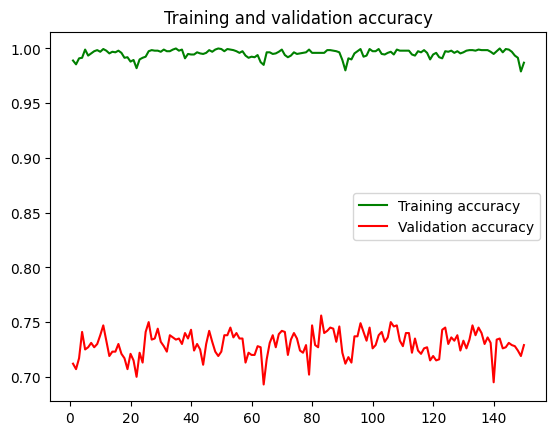

<Figure size 640x480 with 0 Axes>

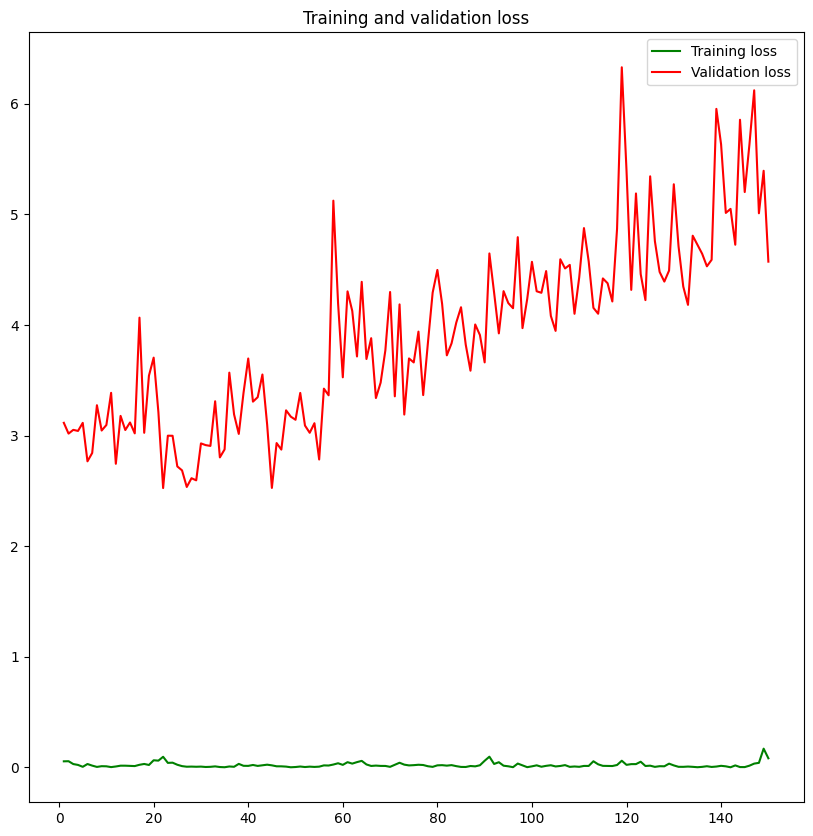

In [ ]:
import matplotlib.pyplot as plt
accuracy = historyA.history["accuracy"]
validation_accuracy = historyA.history["val_accuracy"]
loss = historyA.history["loss"]
validation_loss = historyA.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, validation_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_accuracyfit1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_accuracyfit1.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 5s 115ms/step - loss: 2.4840 - accuracy: 0.6770
Test accuracy: 0.677


2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

Using the data augmentation

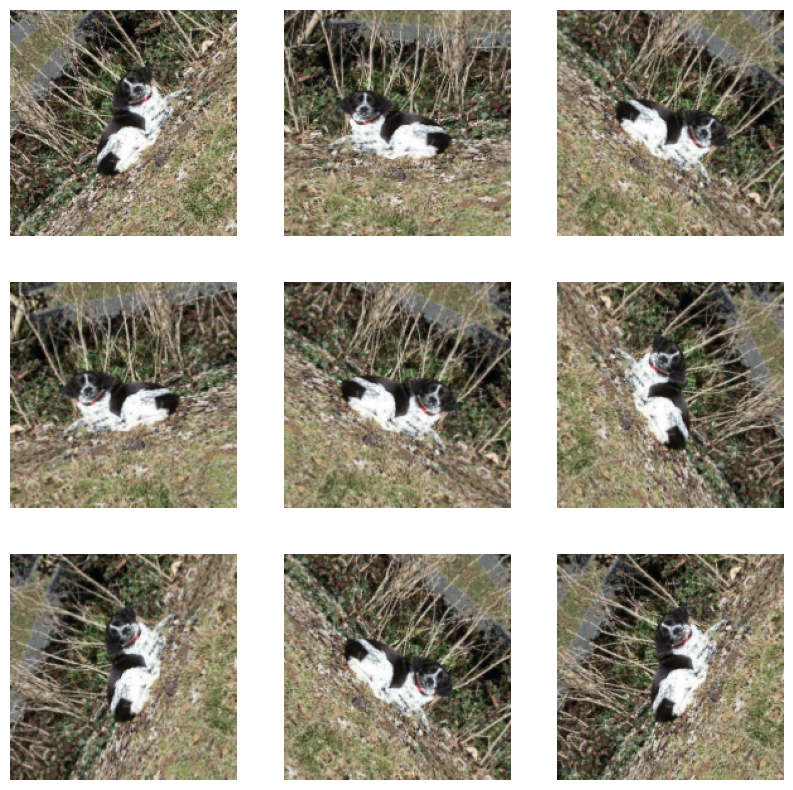

In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

ori_dir = pathlib.Path("train")
new_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=ori_dir / fname,
            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.

make_subset("train", start_index=800, end_index=2300)
make_subset("validation", start_index=2301, end_index=2801)
make_subset("test", start_index=2802, end_index=3302)

augmen_info = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.01),
    ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_set.take(1):
    for i in range(9):
        augmen_images = augmen_info(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmen_images[0].numpy().astype("uint8"))
        plt.axis("off")

A convolutional neural network incorporating dropout and image augmentation techniques.

In [ ]:
inputB = keras.Input(shape=(180, 180, 3))
dinB = augmen_info(inputB)
dinB = layers.Rescaling(1./255)(dinB)
dinB = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(dinB)
dinB = layers.MaxPooling2D(pool_size=2)(dinB)
dinB = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(dinB)
dinB = layers.MaxPooling2D(pool_size=2)(dinB)
dinB = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(dinB)
dinB = layers.MaxPooling2D(pool_size=2)(dinB)
dinB = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(dinB)
dinB = layers.MaxPooling2D(pool_size=2)(dinB)
dinB = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(dinB)
dinB = layers.Flatten()(dinB)
dinB = layers.Dropout(0.5)(dinB)
outputB = layers.Dense(1, activation="sigmoid")(dinB)
modelB = keras.Model(inputs=inputB, outputs=outputB)

modelB.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])
callbackB = [
        keras.callbacks.ModelCheckpoint(
            filepath="convnet_from_scratch_with_augmentation_info.keras",
            save_best_only=True,
            monitor="val_loss")
]
histB = modelB.fit(
            train_set,
            epochs=150,
            validation_data=valid_set,
            callbacks=callbackB)

Epoch 1/150
63/63 [==============================] - 12s 124ms/step - loss: 0.6942 - accuracy: 0.4995 - val_loss: 0.6925 - val_accuracy: 0.5390
Epoch 2/150
63/63 [==============================] - 5s 80ms/step - loss: 0.6918 - accuracy: 0.5085 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 3/150
63/63 [==============================] - 4s 62ms/step - loss: 0.6919 - accuracy: 0.5375 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 4/150
63/63 [==============================] - 5s 82ms/step - loss: 0.6813 - accuracy: 0.5585 - val_loss: 0.6839 - val_accuracy: 0.5450
Epoch 5/150
63/63 [==============================] - 4s 59ms/step - loss: 0.6791 - accuracy: 0.5790 - val_loss: 0.6763 - val_accuracy: 0.5530
Epoch 6/150
63/63 [==============================] - 4s 65ms/step - loss: 0.6682 - accuracy: 0.5945 - val_loss: 0.6493 - val_accuracy: 0.6180
Epoch 7/150
63/63 [==============================] - 7s 100ms/step - loss: 0.6547 - accuracy: 0.6240 - val_loss: 0.6264 - val_accuracy: 0.6740
Epo

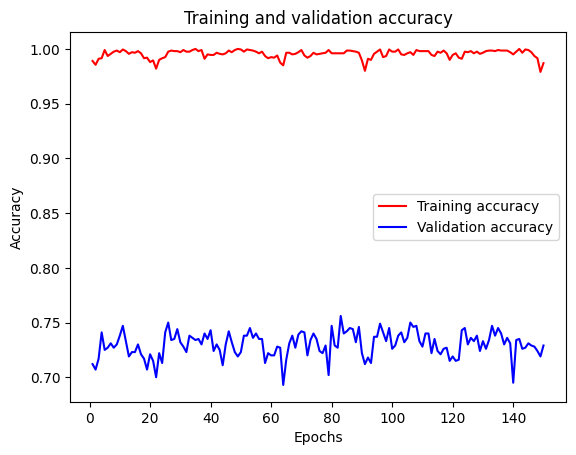

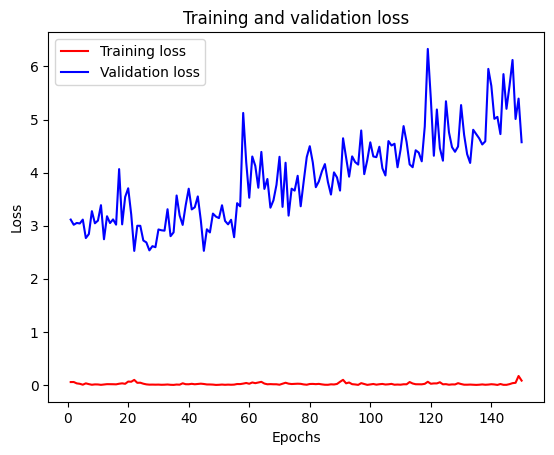

In [ ]:
accuracy_1 = historyA.history["accuracy"]
validacc_1 = historyA.history["val_accuracy"]
loss_2 = historyA.history["loss"]
validloss_2 = historyA.history["val_loss"]
epochs = range(1, len(accuracy_1) + 1)

plt.plot(epochs, accuracy_1, "r", label="Training accuracy")
plt.plot(epochs, validacc_1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss_2, "r", label="Training loss")
plt.plot(epochs, validloss_2, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Calculating test model accuracy

In [ ]:
test_accuracyfit2= keras.models.load_model(
        "convnet_from_scratch_with_augmentation_info.keras")
test_loss, test_acc = test_accuracyfit2.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 29ms/step - loss: 0.4596 - accuracy: 0.8170
Test accuracy: 0.817


3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [ ]:
ori_dir = pathlib.Path("train")
new_dir = pathlib.Path("cats_vs_dogs_small_Q3")
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_dir / subset_name / category
    if not dir.exists():
      os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=ori_dir / fname,
                      dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=800, end_index=2800)
make_subset("validation", start_index=2801, end_index=3301)
make_subset("test", start_index=3302, end_index=3802)

inputC = keras.Input(shape=(180, 180, 3))
dinC = augmen_info(inputC)
dinC = layers.Rescaling(1./255)(dinC)
dinC = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(dinC)
dinC = layers.MaxPooling2D(pool_size=2)(dinC)
dinC = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(dinC)
dinC = layers.MaxPooling2D(pool_size=2)(dinC)
dinC = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(dinC)
dinC = layers.MaxPooling2D(pool_size=2)(dinC)
dinC = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(dinC)
dinC = layers.MaxPooling2D(pool_size=2)(dinC)
dinC = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(dinC)
dinC = layers.Flatten()(dinC)
dinC = layers.Dropout(0.5)(dinC)
outputC = layers.Dense(1, activation="sigmoid")(dinC)
modelC = keras.Model(inputs=inputC, outputs=outputC)

modelC.compile(loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])
callbackC = [
        keras.callbacks.ModelCheckpoint(
            filepath="convnet_from_scratch_with_augmentation_info.keras",
            save_best_only=True,
            monitor="val_loss")
]
historyC = modelC.fit(
      train_set,
      epochs=150,
      validation_data=valid_set,
      callbacks=callbackC)

Epoch 1/150
63/63 [==============================] - 6s 64ms/step - loss: 0.6931 - accuracy: 0.5110 - val_loss: 0.6921 - val_accuracy: 0.6420
Epoch 2/150
63/63 [==============================] - 7s 101ms/step - loss: 0.6930 - accuracy: 0.5030 - val_loss: 0.6879 - val_accuracy: 0.5440
Epoch 3/150
63/63 [==============================] - 4s 60ms/step - loss: 0.6901 - accuracy: 0.5485 - val_loss: 0.6849 - val_accuracy: 0.5630
Epoch 4/150
63/63 [==============================] - 4s 64ms/step - loss: 0.6779 - accuracy: 0.5610 - val_loss: 0.6571 - val_accuracy: 0.6080
Epoch 5/150
63/63 [==============================] - 7s 97ms/step - loss: 0.6849 - accuracy: 0.5445 - val_loss: 0.6506 - val_accuracy: 0.6120
Epoch 6/150
63/63 [==============================] - 6s 85ms/step - loss: 0.6681 - accuracy: 0.5915 - val_loss: 0.6515 - val_accuracy: 0.6200
Epoch 7/150
63/63 [==============================] - 5s 66ms/step - loss: 0.6485 - accuracy: 0.6240 - val_loss: 0.6305 - val_accuracy: 0.6460
Epoch

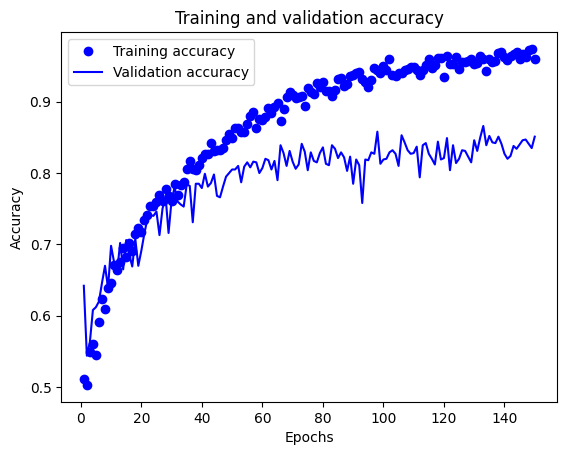

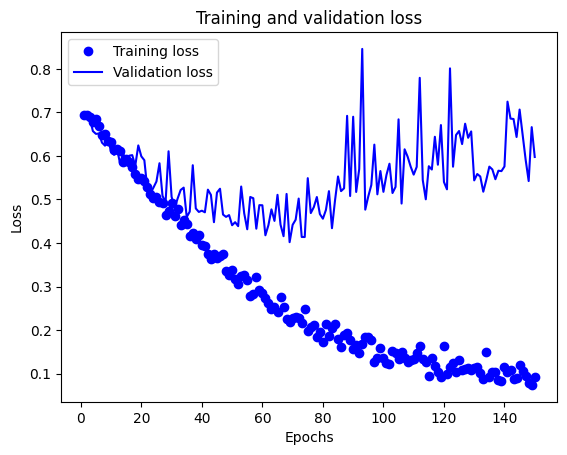

In [ ]:
r K,accuracy_B = historyC.history["accuracy"]
valac_B = historyC.history["val_accuracy"]
loss_B = historyC.history["loss"]
valloss_B = historyC.history["val_loss"]
epochs = range(1, len(accuracy_B) + 1)

plt.plot(epochs, accuracy_B, "bo", label="Training accuracy")
plt.plot(epochs, valac_B, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss_B, "bo", label="Training loss")
plt.plot(epochs, valloss_B, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_accuracyfit3 = keras.models.load_model(
"convnet_from_scratch_with_augmentation_info.keras")
test_loss, test_acc = test_accuracyfit3.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4401 - accuracy: 0.8230
Test accuracy: 0.823


4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

In [ ]:
convoluted = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
convoluted.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np
import keras

def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convoluted.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

training_features, training_labels = get_features_and_labels(train_set)
validation_features, validation_labels = get_features_and_labels(valid_set)
testing_features, testing_labels = get_features_and_labels(test_set)

1/1 [==============================] - 0s 31ms/step


In [ ]:
training_features.shape
(2000, 5, 5, 512)
inputD = keras.Input(shape=(5, 5, 512))
dinD = layers.Flatten()(inputD)
dinD = layers.Dense(256)(dinD)
dinD = layers.Dropout(0.5)(dinD)
outputD = layers.Dense(1, activation="sigmoid")(dinD)
modelD = keras.Model(inputD, outputD)
modelD.compile(loss="binary_crossentropy",
                  optimizer="rmsprop",
                  metrics=["accuracy"])
callbackD = [
      keras.callbacks.ModelCheckpoint(
          filepath="feature_extraction.keras",
          save_best_only=True,
          monitor="val_loss")
]
historyD = modelD.fit(
        training_features, training_labels,
        epochs=150,
        validation_data=(validation_features, validation_labels),
        callbacks=callbackD)

Epoch 1/150
63/63 [==============================] - 1s 12ms/step - loss: 13.6483 - accuracy: 0.9325 - val_loss: 5.3159 - val_accuracy: 0.9730
Epoch 2/150
63/63 [==============================] - 1s 10ms/step - loss: 3.6542 - accuracy: 0.9805 - val_loss: 6.1917 - val_accuracy: 0.9720
Epoch 3/150
63/63 [==============================] - 1s 11ms/step - loss: 1.6352 - accuracy: 0.9880 - val_loss: 8.0787 - val_accuracy: 0.9730
Epoch 4/150
63/63 [==============================] - 1s 11ms/step - loss: 1.3712 - accuracy: 0.9890 - val_loss: 4.8470 - val_accuracy: 0.9770
Epoch 5/150
63/63 [==============================] - 1s 9ms/step - loss: 0.8860 - accuracy: 0.9930 - val_loss: 8.1340 - val_accuracy: 0.9600
Epoch 6/150
63/63 [==============================] - 1s 9ms/step - loss: 0.8092 - accuracy: 0.9935 - val_loss: 5.2469 - val_accuracy: 0.9780
Epoch 7/150
63/63 [==============================] - 1s 16ms/step - loss: 0.5515 - accuracy: 0.9930 - val_loss: 5.9106 - val_accuracy: 0.9800
Epoch 8

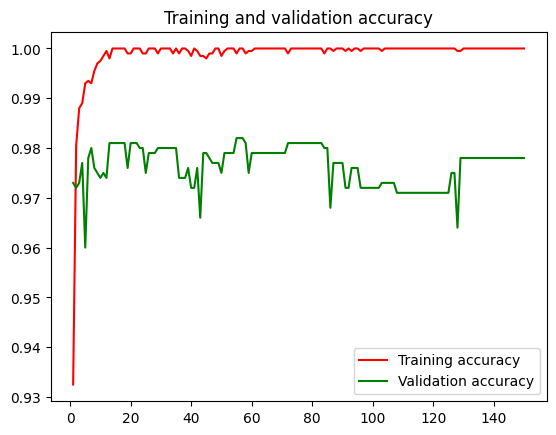

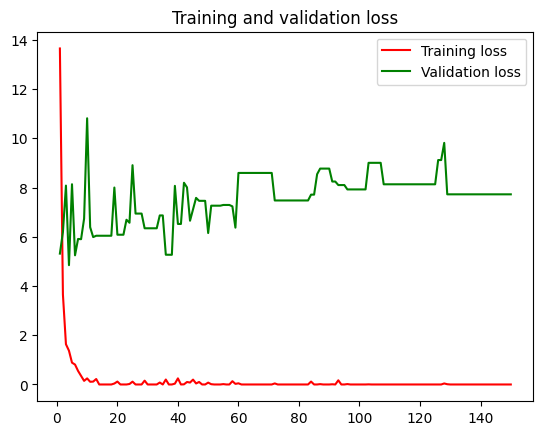

In [ ]:
import matplotlib.pyplot as plt
accuracyA = historyD.history["accuracy"]
valadationA = historyD.history["val_accuracy"]
lossA = historyD.history["loss"]
validationlossA = historyD.history["val_loss"]
epochs = range(1, len(accuracyA) + 1)
plt.plot(epochs, accuracyA, "r", label="Training accuracy")
plt.plot(epochs, valadationA, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, lossA, "r", label="Training loss")
plt.plot(epochs, validationlossA, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
convoluted = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
convoluted.trainable = False
convoluted.trainable = True
print("This is the number of trainable weights "
"before freezing the conv base:", len(convoluted.trainable_weights))
convoluted.trainable = False
print("This is the number of trainable weights "
"after freezing the conv base:", len(convoluted.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
augmented2 = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)
inputE = keras.Input(shape=(180, 180, 3))
dinE = augmented2(inputE)
dinE =keras.layers.Lambda(
lambda x: keras.applications.vgg16.preprocess_input(x))(dinE)
dinE = convoluted(dinE)
dinE = layers.Flatten()(dinE)
dinE = layers.Dense(256)(dinE)
dinE = layers.Dropout(0.5)(dinE)
outputs = layers.Dense(1, activation="sigmoid")(dinE)
modelE = keras.Model(inputE, outputs)
modelE.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])
callbafi = [
keras.callbacks.ModelCheckpoint(
filepath="features_extraction_with_augmentation2.keras",
save_best_only=True,
monitor="val_loss"
)
]
historyfi = modelE.fit(
train_set,
epochs=150,
validation_data=valid_set,
callbacks=callbafi
)

Epoch 1/150
63/63 [==============================] - 15s 207ms/step - loss: 20.4862 - accuracy: 0.8965 - val_loss: 1.9415 - val_accuracy: 0.9820
Epoch 2/150
63/63 [==============================] - 11s 164ms/step - loss: 7.4529 - accuracy: 0.9425 - val_loss: 5.4427 - val_accuracy: 0.9640
Epoch 3/150
63/63 [==============================] - 11s 159ms/step - loss: 6.0885 - accuracy: 0.9570 - val_loss: 4.4812 - val_accuracy: 0.9750
Epoch 4/150
63/63 [==============================] - 10s 162ms/step - loss: 4.4690 - accuracy: 0.9675 - val_loss: 6.6210 - val_accuracy: 0.9710
Epoch 5/150
63/63 [==============================] - 12s 183ms/step - loss: 4.9354 - accuracy: 0.9605 - val_loss: 4.9892 - val_accuracy: 0.9740
Epoch 6/150
63/63 [==============================] - 11s 166ms/step - loss: 4.5922 - accuracy: 0.9645 - val_loss: 5.0063 - val_accuracy: 0.9670
Epoch 7/150
63/63 [==============================] - 12s 190ms/step - loss: 3.3887 - accuracy: 0.9755 - val_loss: 3.7633 - val_accuracy

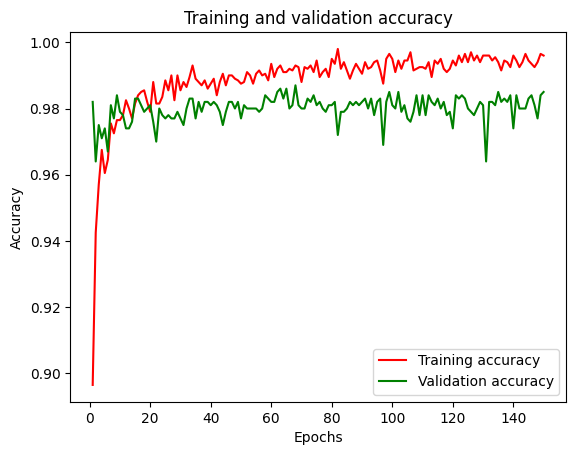

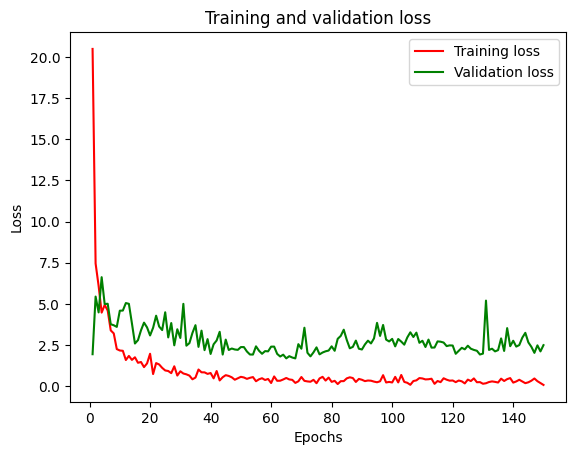

In [ ]:
accuracyfi = historyfi.history["accuracy"]
valacfi = historyfi.history["val_accuracy"]
lossfi = historyfi.history["loss"]
vallossfi = historyfi.history["val_loss"]
epochs = range(1, len(accuracyfi) + 1)

plt.plot(epochs, accuracyfi, "r", label="Training accuracy")
plt.plot(epochs, valacfi, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, lossfi, "r", label="Training loss")
plt.plot(epochs, vallossfi, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_accuracyfit4 = keras.models.load_model(
"features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_accuracyfit4.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 84ms/step - loss: 4.2350 - accuracy: 0.9690
Test accuracy: 0.969


In [41]:
convoluted.trainable = True
for layer in convoluted.layers[:-4]:
    layer.trainable = False
modelE.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])
callbacktuning = [
keras.callbacks.ModelCheckpoint(
filepath="fine_tuning.keras",
save_best_only=True,
monitor="val_loss")
]
historytuning = modelE.fit(
train_set,
epochs=150,
validation_data=valid_set,
callbacks=callbacktuning)

Epoch 1/150
63/63 [==============================] - 15s 163ms/step - loss: 0.3312 - accuracy: 0.9930 - val_loss: 2.4459 - val_accuracy: 0.9810
Epoch 2/150
63/63 [==============================] - 10s 160ms/step - loss: 0.2961 - accuracy: 0.9945 - val_loss: 2.9926 - val_accuracy: 0.9840
Epoch 3/150
63/63 [==============================] - 10s 152ms/step - loss: 0.1847 - accuracy: 0.9950 - val_loss: 3.1582 - val_accuracy: 0.9840
Epoch 4/150
63/63 [==============================] - 11s 167ms/step - loss: 0.3026 - accuracy: 0.9955 - val_loss: 2.4328 - val_accuracy: 0.9820
Epoch 5/150
63/63 [==============================] - 12s 188ms/step - loss: 0.1075 - accuracy: 0.9965 - val_loss: 2.7399 - val_accuracy: 0.9790
Epoch 6/150
63/63 [==============================] - 11s 172ms/step - loss: 0.1774 - accuracy: 0.9955 - val_loss: 2.8866 - val_accuracy: 0.9830
Epoch 7/150
63/63 [==============================] - 12s 188ms/step - loss: 0.6246 - accuracy: 0.9910 - val_loss: 2.8075 - val_accuracy:

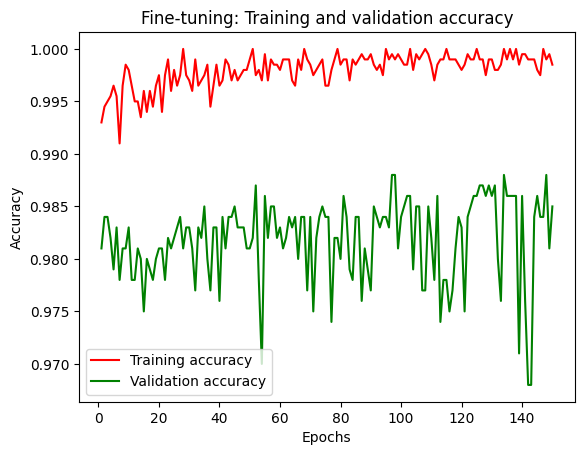

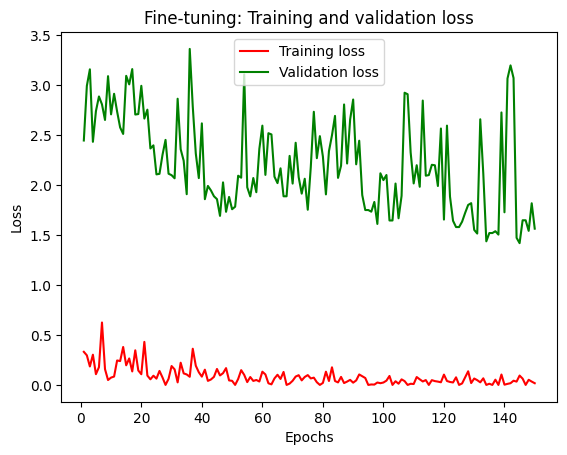

In [42]:
accuracytuning = historytuning.history["accuracy"]
valtuning = historytuning.history["val_accuracy"]
losstuning = historytuning.history["loss"]
vallosstuning = historytuning.history["val_loss"]
epochs = range(1, len(accuracytuning) + 1)

plt.plot(epochs, accuracytuning, "r", label="Training accuracy")
plt.plot(epochs, valtuning, "g", label="Validation accuracy")
plt.title("Fine-tuning: Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, losstuning, "r", label="Training loss")
plt.plot(epochs, vallosstuning, "g", label="Validation loss")
plt.title("Fine-tuning: Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [43]:
test_accuracyfit5 = keras.models.load_model(
"fine_tuning.keras",safe_mode=False)
test_loss, test_acc = test_accuracyfit5.evaluate(test_set)
print(f"Test accuracy: {test_acc:.2f}")

32/32 [==============================] - 9s 110ms/step - loss: 3.0701 - accuracy: 0.9720
Test accuracy: 0.97
